<a href="https://colab.research.google.com/github/Johnnereparambil/CIFAR-10-Vision-Classifier/blob/main/CIFAR_10_Vision_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
cifar10 = tf.keras.datasets.cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
len(x_train)

50000

In [5]:
from matplotlib import pyplot as plt

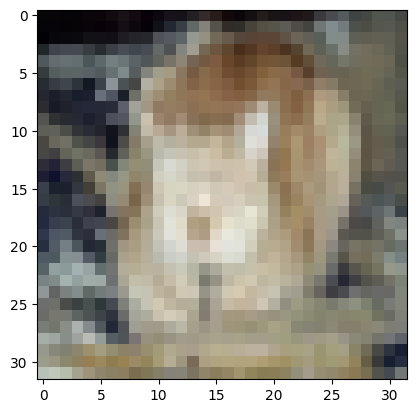

In [6]:
plt.imshow(x_train[33])
plt.show()

In [7]:
y_train[33]

array([3], dtype=uint8)

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', "frog", 'horse', 'ship','truck' ]

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(50, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(50, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(50, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(input_shape=(24, 24, 50)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 100)         │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 50)          │          45,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 50)          │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 50)          │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,780,768 (14.42 MB)

 Trainable params: 3,780,768 (14.42 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

In [13]:
res = model(x_train[28:29])
print(res)

tf.Tensor(
[[0.10064121 0.11347221 0.09433475 0.10221643 0.10834285 0.09099101
  0.09857923 0.09513181 0.10125056 0.09503999]], shape=(1, 10), dtype=float32)
